### ACS Detention Admissions Exploration 

In [1]:
#install packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import geopandas as gpd
import shapely

In [2]:
#read file 
ACS_detention_by_CD = pd.read_csv('/Users/aren_kab/Documents/ACS Job Prep/Detention_Admissions_by_Community_District_20240923.csv')

In [3]:
#Get info 
ACS_detention_by_CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Calendar Year    325 non-null    int64 
 1   Borough          325 non-null    object
 2   Borough/CD       325 non-null    object
 3   Number Admitted  325 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 10.3+ KB


In [4]:
#head of data set - look at data 
ACS_detention_by_CD.head(5)

Calendar Year Borough                       Borough/CD  Number Admitted
0           2019   BRONX          BX01 Mott Haven/Melrose               62
1           2019   BRONX        BX02 Hunts Point/Longwood               22
2           2019   BRONX          BX03 Morrisania/Crotona               49
3           2019   BRONX        BX04 Highbridge/Concourse               45
4           2019   BRONX  BX05 Fordham/University Heights               42

In [5]:
#summerize table
ACS_detention_by_CD.describe() 

Calendar Year  Number Admitted
count     325.000000       325.000000
mean     2021.000000        22.781538
std         1.416394        20.441990
min      2019.000000         0.000000
25%      2020.000000         8.000000
50%      2021.000000        16.000000
75%      2022.000000        33.000000
max      2023.000000       108.000000

In [6]:
ACS_detention_by_CD.head()

Calendar Year Borough                       Borough/CD  Number Admitted
0           2019   BRONX          BX01 Mott Haven/Melrose               62
1           2019   BRONX        BX02 Hunts Point/Longwood               22
2           2019   BRONX          BX03 Morrisania/Crotona               49
3           2019   BRONX        BX04 Highbridge/Concourse               45
4           2019   BRONX  BX05 Fordham/University Heights               42

## Get Started With This Data:

### What boroughs are young people entering detention most often from?
### Extra: What is the distribution of detention admissions accross boroughs for 2020 (incuding population)?
### What community districts are young people entering detention most often from?
### What is the ranking of home community districts for youth entering detention? 


In [7]:
### What boroughs are young people entering detention most often from?
### Extra: What is the distribution of detention admissions accross boroughs for 2020 (incuding population)?
## DO sum by boroughs 
ACS_Borough_Sums_all_years = ACS_detention_by_CD.groupby('Borough')[['Number Admitted']].sum().reset_index().sort_values(by='Number Admitted',ascending=False)
ACS_Borough_Sums_all_years

Borough  Number Admitted
0                   BRONX             2136
1                BROOKLYN             2081
4                  QUEENS             1331
2               MANHATTAN             1138
5           STATEN ISLAND              388
3  OUTSIDE OF NYC/UNKNOWN              330

In [8]:
#Lets restrict to only Boroughs we know 
ACS_Borough_Sums_all_years = ACS_Borough_Sums_all_years.loc[:5]
#Fix Case
ACS_Borough_Sums_all_years['Borough']= ACS_Borough_Sums_all_years['Borough'].str.title()

/var/folders/vp/2flcfxx12ns473tz77qt51v80000gn/T/ipykernel_18630/2180205020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACS_Borough_Sums_all_years['Borough']= ACS_Borough_Sums_all_years['Borough'].str.title()


In [9]:
ACS_Borough_Sums_all_years = ACS_Borough_Sums_all_years.sort_values(by='Borough',ascending=True)
ACS_Borough_Sums_all_years

Borough  Number Admitted
0          Bronx             2136
1       Brooklyn             2081
2      Manhattan             1138
4         Queens             1331
5  Staten Island              388

In [10]:
# Plot total numbers for all years
import plotly.express as px

fig1 = px.bar(ACS_Borough_Sums_all_years, x="Borough", y="Number Admitted",color="Borough",text="Number Admitted", title="Juvinelle Detention by Borough (All Years)")
fig1.update_layout(showlegend=False)
##If you want to export to html - fig.write_html("path/to/file.html")

### Brooklyn and the Bronx have the most admission numbers but are close. This is followed by Queens, Manhattan and Staten Island. Let's add more context here with population though

In [11]:
#Lets isolate these results to one year - and do it in context of population
ACS_Borough_2020 = ACS_detention_by_CD[ACS_detention_by_CD['Calendar Year'] == 2020]
ACS_Borough_2020_Sums = ACS_Borough_2020.groupby('Borough')[['Number Admitted']].sum().reset_index().sort_values(by='Number Admitted', ascending=False)
ACS_Borough_2020_Sums

Borough  Number Admitted
0                   BRONX              321
1                BROOKLYN              314
4                  QUEENS              202
2               MANHATTAN              168
5           STATEN ISLAND               47
3  OUTSIDE OF NYC/UNKNOWN               33

In [12]:
#Lets isolate these results to one year - and do it in context of population
#first_read in pop dataset
nyc_pop_boro = pd.read_csv('/Users/aren_kab/Documents/ACS Job Prep/New_York_City_Population_by_Borough__1950_-_2040_20240923.csv')
nyc_pop_boro.head(6)

Age Group           Borough     1950  \
0  Total Population         NYC Total  7891957   
1  Total Population             Bronx  1451277   
2  Total Population          Brooklyn  2738175   
3  Total Population         Manhattan  1960101   
4  Total Population            Queens  1550849   
5  Total Population     Staten Island   191555   

   1950 - Boro share of NYC total     1960  1960 - Boro share of NYC total  \
0                          100.00  7781984                          100.00   
1                           18.39  1424815                           18.31   
2                           34.70  2627319                           33.76   
3                           24.84  1698281                           21.82   
4                           19.65  1809578                           23.25   
5                            2.43   221991                            2.85   

      1970  1970 - Boro share of NYC total     1980  \
0  7894862                          100.00  7071639   
1  1471701                           18.64  1168972   
2  2602012                           32.96  2230936   
3  1539233                           19.50  1428285   
4  1986473                           25.16  1891325   
5   295443                            3.74   352121   

   1980 - Boro share of NYC total  ...     2000  \
0                          100.00  ...  8008278   
1                           16.53  ...  1332650   
2                           31.55  ...  2465326   
3                           20.20  ...  1537195   
4                           26.75  ...  2229379   
5                            4.98  ...   443728   

   2000 - Boro share of NYC total     2010  2010 - Boro share of NYC total  \
0                          100.00  8242624                          100.00   
1                           16.64  1385108                           16.80   
2                           30.78  2552911                           30.97   
3                           19.20  1585873                           19.24   
4                           27.84  2250002                           27.30   
5                            5.54   468730                            5.69   

      2020  2020 - Boro share of NYC total     2030  \
0  8550971                          100.00  8821027   
1  1446788                           16.92  1518998   
2  2648452                           30.97  2754009   
3  1638281                           19.16  1676720   
4  2330295                           27.25  2373551   
5   487155                            5.70   497749   

   2030 - Boro share of NYC total     2040  2040 - Boro share of NYC total  
0                          100.00  9025145                          100.00  
1                           17.22  1579245                           17.50  
2                           31.22  2840525                           31.47  
3                           19.01  1691617                           18.74  
4                           26.91  2412649                           26.73  
5                            5.64   501109                            5.55  

[6 rows x 22 columns]

In [13]:
import string
nyc_pop_boro.Borough= nyc_pop_boro['Borough'].astype('string').str.title()
#capitilize for standardization

In [14]:
#only get 2020 pop
nyc_pop_boro_2020 = nyc_pop_boro[["Borough","2020"]].copy()
nyc_pop_boro_2020.Borough= nyc_pop_boro_2020['Borough'].astype('string')

In [15]:
# only keep NYC boroughs + index
nyc_pop_boro_2020 = nyc_pop_boro_2020.loc[1:].set_index(['Borough'])
nyc_pop_boro_2020

2020
Borough               
Bronx          1446788
Brooklyn       2648452
Manhattan      1638281
Queens         2330295
Staten Island   487155

In [16]:
ACS_Borough_2020_Sums['Borough'] = ACS_Borough_2020_Sums['Borough'].astype('string')
#capatilize for merging
ACS_Borough_2020_Sums['Borough'] = ACS_Borough_2020_Sums['Borough'].str.title()
ACS_Borough_2020_Sums


Borough  Number Admitted
0                   Bronx              321
1                Brooklyn              314
4                  Queens              202
2               Manhattan              168
5           Staten Island               47
3  Outside Of Nyc/Unknown               33

In [17]:
#only keep NYC boroughs + index
ACS_Borough_2020_Sums=ACS_Borough_2020_Sums.loc[:5].set_index(['Borough'])
ACS_Borough_2020_Sums

Number Admitted
Borough                       
Bronx                      321
Brooklyn                   314
Queens                     202
Manhattan                  168
Staten Island               47

In [18]:
nyc_pop_boro_2020

2020
Borough               
Bronx          1446788
Brooklyn       2648452
Manhattan      1638281
Queens         2330295
Staten Island   487155

In [19]:
ACS_Borough_2020_Sums

Number Admitted
Borough                       
Bronx                      321
Brooklyn                   314
Queens                     202
Manhattan                  168
Staten Island               47

In [20]:
ACS_Borough_2020_Sums.index

Index(['Bronx', 'Brooklyn', 'Queens', 'Manhattan', 'Staten Island'], dtype='string', name='Borough')

In [21]:
nyc_pop_boro_2020.index

Index(['   Bronx', '   Brooklyn', '   Manhattan', '   Queens',
       '   Staten Island'],
      dtype='string', name='Borough')

In [22]:
#index is off here with spacing_fix it
nyc_pop_boro_2020.index = nyc_pop_boro_2020.index.str.strip()


In [23]:
#Merge Datasets
Merged_ACS_Pop_Data_2020 = ACS_Borough_2020_Sums.merge(nyc_pop_boro_2020, on='Borough', how='right')
Merged_ACS_Pop_Data_2020

Number Admitted     2020
Borough                                
Bronx                      321  1446788
Brooklyn                   314  2648452
Manhattan                  168  1638281
Queens                     202  2330295
Staten Island               47   487155

In [24]:
#Population Share - do Admitted / population -  its % BUT made more legible
Merged_ACS_Pop_Data_2020['Juvenille_Admitted_Pop_Density(%*10)'] = ((Merged_ACS_Pop_Data_2020['Number Admitted']/Merged_ACS_Pop_Data_2020['2020'])*10000).round(2)

In [25]:
#Display Results here
Merged_ACS_Pop_Data_2020 = Merged_ACS_Pop_Data_2020
Merged_ACS_Pop_Data_2020= Merged_ACS_Pop_Data_2020.reset_index()
Merged_ACS_Pop_Data_2020

Borough  Number Admitted     2020  \
0          Bronx              321  1446788   
1       Brooklyn              314  2648452   
2      Manhattan              168  1638281   
3         Queens              202  2330295   
4  Staten Island               47   487155   

   Juvenille_Admitted_Pop_Density(%*10)  
0                                  2.22  
1                                  1.19  
2                                  1.03  
3                                  0.87  
4                                  0.96

In [26]:
#plot results for visual aid + interpretation
fig2 = px.bar(Merged_ACS_Pop_Data_2020, x=Merged_ACS_Pop_Data_2020['Borough'], y=Merged_ACS_Pop_Data_2020['Juvenille_Admitted_Pop_Density(%*10)'],color=Merged_ACS_Pop_Data_2020['Borough'],text="Juvenille_Admitted_Pop_Density(%*10)", title="Juvinelle Detention by Borough 2020 (w/ Population Density)")
fig2.update_layout(showlegend=False)
fig2.show(figsize=(20,9))

### In Context this data is revealing: the Bronx has a almost a double share of any other boroughs in terms of denity, this also shows that queens crime is third overall as raw numbers but last when considering population. 

#### Important to keep in mind a data caveat here is that this is overall population not juvenille population- 


In [27]:
#Grouped bar \
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Overall Detention', x=ACS_Borough_Sums_all_years["Borough"], y=ACS_Borough_Sums_all_years["Number Admitted"], yaxis='y',offsetgroup=1),
    go.Bar(name='Population Density Adjusted (%*10)', x=ACS_Borough_Sums_all_years["Borough"], y=Merged_ACS_Pop_Data_2020['Juvenille_Admitted_Pop_Density(%*10)'], yaxis='y2',offsetgroup=2)

# Change the bar mode
 ],
    layout={
        'yaxis': {'title': 'Overall Detention Axis'},
        'yaxis2': {'title': 'Population Density Axis', 'overlaying': 'y', 'side': 'right'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

## Now lets map this data 

In [28]:
import geopandas as gpd

Borough_Boundry = gpd.read_file("/Users/aren_kab/Documents/ACS Job Prep/Borough Boundaries.geojson")
Borough_Boundry

boro_code      boro_name     shape_area     shape_leng  \
0         3       Brooklyn  1934142775.63  728147.130565   
1         5  Staten Island  1623618684.31  325910.306061   
2         1      Manhattan  636646082.483  360037.525777   
3         2          Bronx  1187174772.32  463180.578878   
4         4         Queens   3041418003.6  888197.010944   

                                            geometry  
0  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
1  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
3  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...

In [29]:
Juvinille_data_including_mapping = Borough_Boundry.merge(Merged_ACS_Pop_Data_2020, left_on='boro_name', right_on='Borough',
          suffixes=('_left', '_right'))
Juvinille_data_including_mapping

boro_code      boro_name     shape_area     shape_leng  \
0         3       Brooklyn  1934142775.63  728147.130565   
1         5  Staten Island  1623618684.31  325910.306061   
2         1      Manhattan  636646082.483  360037.525777   
3         2          Bronx  1187174772.32  463180.578878   
4         4         Queens   3041418003.6  888197.010944   

                                            geometry        Borough  \
0  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...       Brooklyn   
1  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  Staten Island   
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...      Manhattan   
3  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...          Bronx   
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...         Queens   

   Number Admitted     2020  Juvenille_Admitted_Pop_Density(%*10)  
0              314  2648452                                  1.19  
1               47   487155                                  0.96  
2              168  1638281                                  1.03  
3              321  1446788                                  2.22  
4              202  2330295                                  0.87

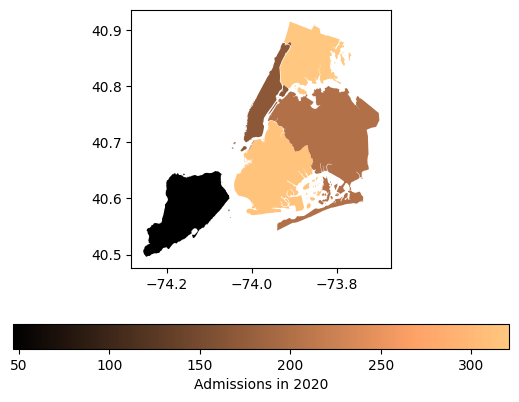

In [30]:
#static map
Juvinille_data_including_mapping.plot(
    column="Number Admitted",
    cmap='copper', 
    legend=True,
    legend_kwds={"label": "Admissions in 2020", "orientation": "horizontal"},
);

In [31]:
#interactive map
import plotly.express as px
import geopandas as gpd
 

Juvinille_data_including_mapping.explore(
    column="Juvenille_Admitted_Pop_Density(%*10)",  # make choropleth based on "BoroName" column
    tooltip="boro_name",  # show "BoroName" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles,
    legend_kwds=dict(colorbar=True),
    cmap="copper",  # use "Set1" matplotlib colormap
    style_kwds=dict(color="black"),  # use black outline
)


### As you can see in the interactive map the color scale of the first map shows Bronx and Brooklyn as very close in shade. The interactive map that shows detentions including population density shows how different the bronx is from the other boroughs in color shade, feel free to click on each borough for detailed metrics. 

### 2. What community districts are young people entering detention most often from?
### 3. What is the ranking of home community districts for youth entering detention? 

In [32]:
#Bring Back the main Dataset 
ACS_detention_by_CD.head(5)

Calendar Year Borough                       Borough/CD  Number Admitted
0           2019   BRONX          BX01 Mott Haven/Melrose               62
1           2019   BRONX        BX02 Hunts Point/Longwood               22
2           2019   BRONX          BX03 Morrisania/Crotona               49
3           2019   BRONX        BX04 Highbridge/Concourse               45
4           2019   BRONX  BX05 Fordham/University Heights               42

In [33]:
#Let's Group it by CD
ACS_CD_Sums = ACS_detention_by_CD.groupby('Borough/CD')[['Number Admitted']].sum().reset_index().sort_values(by='Number Admitted', ascending=False)
ACS_CD_Sums['Borough/CD'] = ACS_CD_Sums['Borough/CD'].astype('string')

ACS_CD_Sums.head(10)


Borough/CD  Number Admitted
4   BK05 East New York/Starrett City              339
42            Outside of NYC/Unknown              330
52               QN12 Jamaica/Hollis              302
60                        Unknown CD              301
57       S101 Saint George/Stapleton              288
40                  MN11 East Harlem              274
15                  BK16 Brownsville              268
29    BX12 Williamsbridge/Baychester              265
26        BX09 Parkchester/Soundview              246
18           BX01 Mott Haven/Melrose              242

In [34]:
ACS_CD_Sums.dtypes

Borough/CD         string
Number Admitted     int64
dtype: object

In [35]:
#Get rid of unknown to get true top 10
mask = ACS_CD_Sums['Borough/CD'] == ('Outside of NYC/Unknown')
ACS_CD_Sums = ACS_CD_Sums[~mask]
mask2 = ACS_CD_Sums['Borough/CD'] == ('Unknown CD')
ACS_CD_Sums = ACS_CD_Sums[~mask2]
ACS_CD_Sums.head(10)

Borough/CD  Number Admitted
4   BK05 East New York/Starrett City              339
52               QN12 Jamaica/Hollis              302
57       S101 Saint George/Stapleton              288
40                  MN11 East Harlem              274
15                  BK16 Brownsville              268
29    BX12 Williamsbridge/Baychester              265
26        BX09 Parkchester/Soundview              246
18           BX01 Mott Haven/Melrose              242
54       QN14 Rockaway/Broad Channel              233
22   BX05 Fordham/University Heights              233

In [36]:
#Plot top 5
ACS_CD_Sums_for_plot=ACS_CD_Sums.head(5)

In [37]:
fig3 = px.bar(ACS_CD_Sums_for_plot, y=ACS_CD_Sums_for_plot['Borough/CD'], x=ACS_CD_Sums_for_plot['Number Admitted'],color=ACS_CD_Sums_for_plot['Borough/CD'],text="Number Admitted", title="Top 5 CDs w/ Juvinille Admissions",orientation='h')
fig3.update_layout(showlegend=False)

fig3.show()


###  Intrestingly enough each of the boroughs are represented in the top 5 community Districts of admissions, remember that this is not with context of population of CD and just overall numbers admitted
